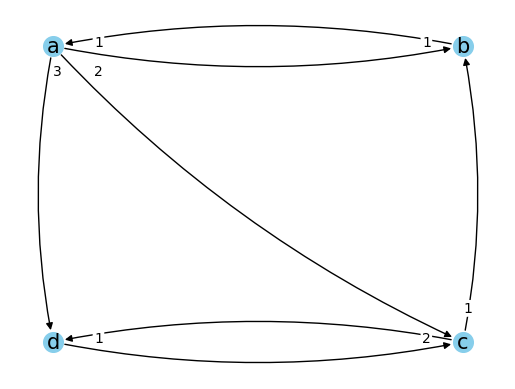

Caminhos de 'a' para 'b':
['a', 'b']
['a', 'c', 'b']
['a', 'd', 'c', 'b']
O grafo é cíclico? Sim
Um ciclo encontrado: [('a', 'b', 0), ('b', 'a', 0)]


In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Criando um grafo direcionado
grafo_direcionado = nx.MultiDiGraph()

# Adicionando vértices e arestas com pesos
grafo_direcionado.add_edge('a', 'b', weight=1)
grafo_direcionado.add_edge('b', 'a', weight=1)
grafo_direcionado.add_edge('a', 'c', weight=2)
grafo_direcionado.add_edge('a', 'd', weight=3)
grafo_direcionado.add_edge('c', 'b', weight=1)
grafo_direcionado.add_edge('d', 'c', weight=1)
grafo_direcionado.add_edge('c', 'd', weight=2)

# Definindo a posição dos vértices
posicoes_vertices = {'a': (0, 1), 'b': (1, 1), 'c': (1, 0), 'd': (0, 0)}

# Desenhando o grafo com arcos curvos para arestas bidirecionais
nx.draw_networkx_nodes(grafo_direcionado, posicoes_vertices, node_size=200, node_color='skyblue')
nx.draw_networkx_labels(grafo_direcionado, posicoes_vertices, font_size=15)

# Desenhar as arestas com curvas suaves para distinguir as bidirecionais
for (origem, destino, chave) in grafo_direcionado.edges(keys=True):
    estilo_conexao = 'arc3, rad=0.1' if chave == 0 else 'arc3, rad=-0.1'
    nx.draw_networkx_edges(grafo_direcionado, posicoes_vertices, edgelist=[(origem, destino)], connectionstyle=estilo_conexao)

# Adicionando rótulos de aresta no início de cada aresta
rotulos_arestas = {(origem, destino): dados['weight'] for origem, destino, dados in grafo_direcionado.edges(data=True)}
for (origem, destino), peso in rotulos_arestas.items():
    # Define o deslocamento para mover os rótulos para perto do nó de origem
    pos_origem = posicoes_vertices[origem]
    pos_texto = (pos_origem[0] * 0.9 + posicoes_vertices[destino][0] * 0.1, pos_origem[1] * 0.9 + posicoes_vertices[destino][1] * 0.1)

    # Desenha os rótulos das arestas com fundo branco para melhor visibilidade
    plt.text(pos_texto[0], pos_texto[1], s=peso, bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1'))

# Mostrando o grafo
plt.axis('off')  # Desliga os eixos
plt.show()

# Encontrando caminhos
print("Caminhos de 'a' para 'b':")
for caminho in nx.all_simple_paths(grafo_direcionado, source='a', target='b'):
    print(caminho)

# Verificando a existência de ciclos
grafo_e_aciclico = nx.is_directed_acyclic_graph(grafo_direcionado)
print(f"O grafo é cíclico? {'Não' if grafo_e_aciclico else 'Sim'}")

# Identificando um ciclo (se houver)
try:
    ciclo = nx.find_cycle(grafo_direcionado)
    print("Um ciclo encontrado:", ciclo)
except nx.NetworkXNoCycle:
    print("O grafo é acíclico.")